In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix


# -------------------------------
#    Manual Prep
# -------------------------------

from sklearn import linear_model, datasets
import itertools
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


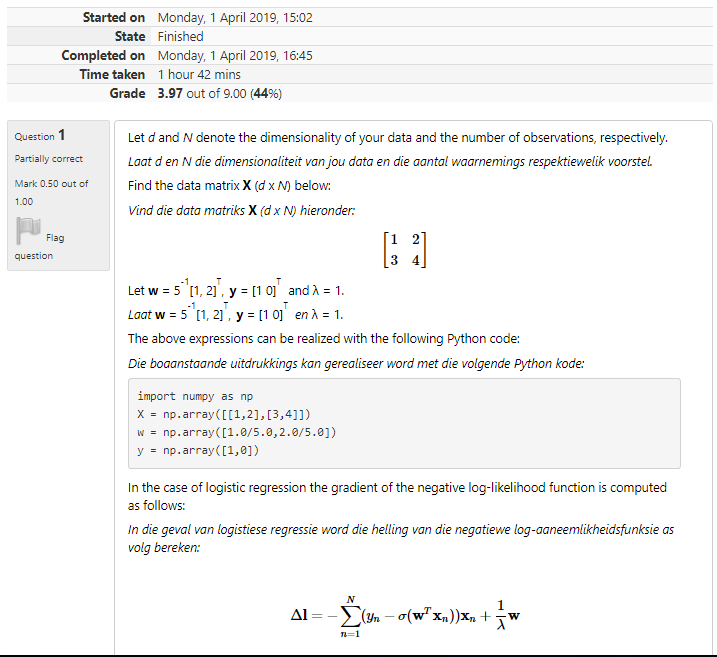

In [2]:
display(Image(filename='./Test_Part_A/Test_1.PNG'))

In [68]:
X =np.array( [[1, 2,], [3, 4]])
d=X.shape[0]
N=X.shape[1]
w=np.array([1/5,2/5])
y=np.array([1,0])
lmda=1

def sigmoid(w, x):

    arg = np.dot(w.T,x)
    
    for i in arg:
        sigmoid= 1/(1 + np.exp(-arg))

    return sigmoid

delta_I=-1*np.dot(  (y-sigmoid(w,X))   , X.T   ) + w

print(delta_I)

[1.76377804 3.32973998]


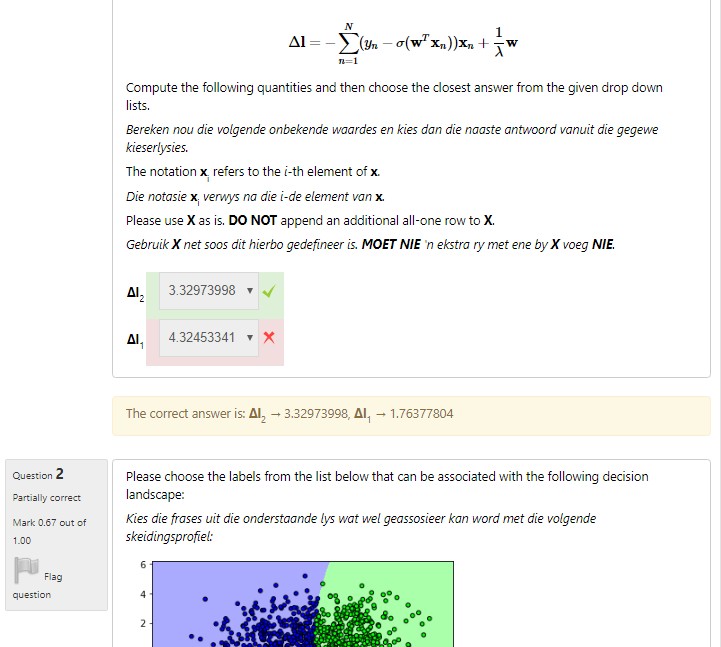

In [3]:
display(Image(filename='./Test_Part_A/Test_2.PNG'))

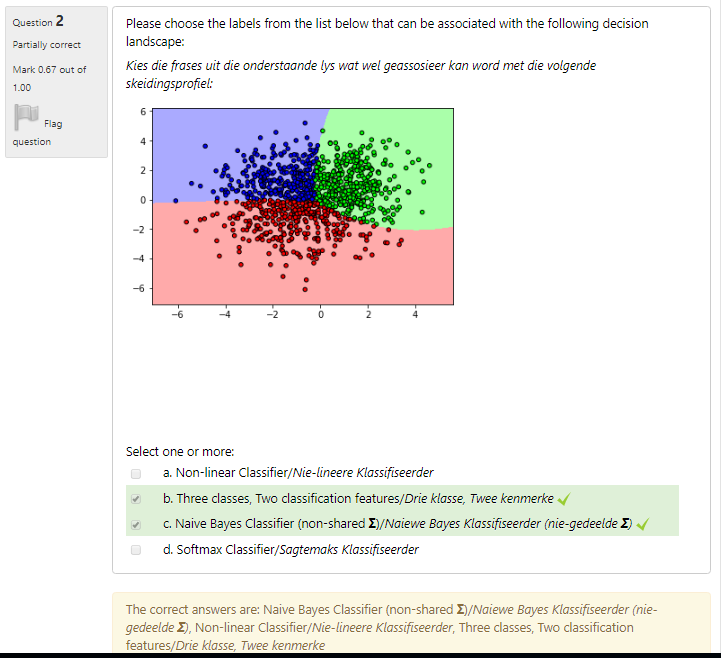

In [4]:
display(Image(filename='./Test_Part_A/Test_3.PNG'))

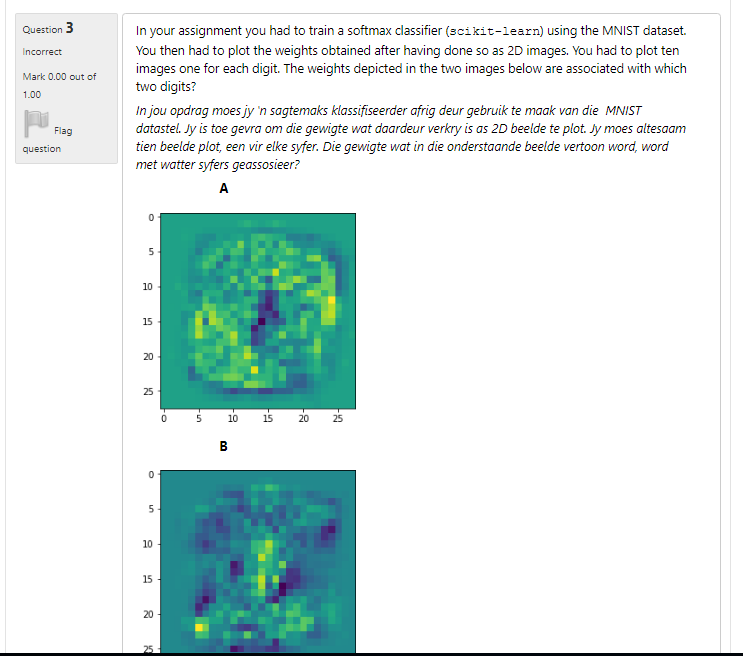

In [5]:
display(Image(filename='./Test_Part_A/Test_4.PNG'))

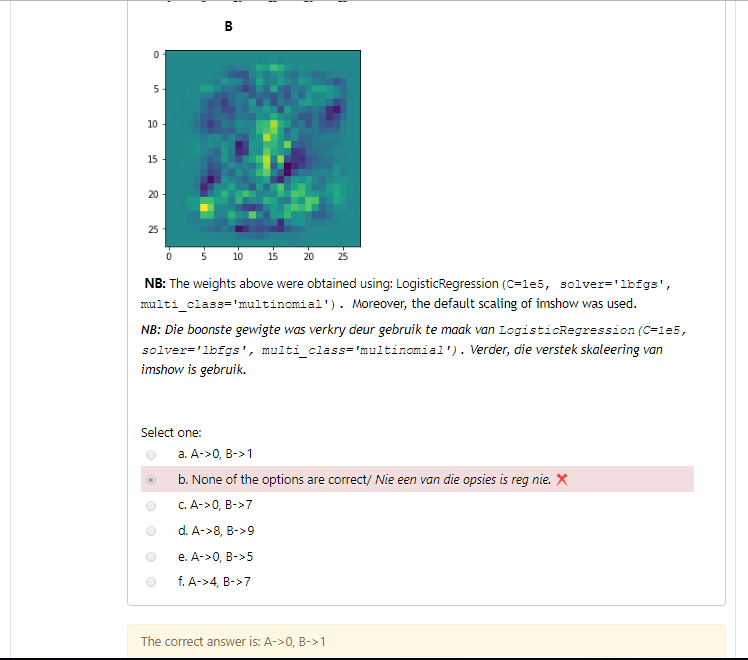

In [6]:
display(Image(filename='./Test_Part_A/Test_5.PNG'))

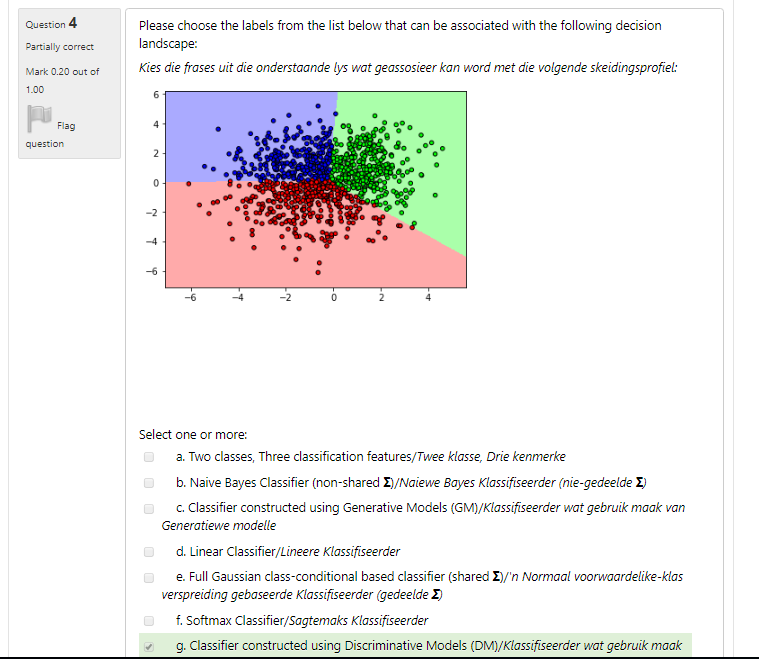

In [7]:
display(Image(filename='./Test_Part_A/Test_6.PNG'))

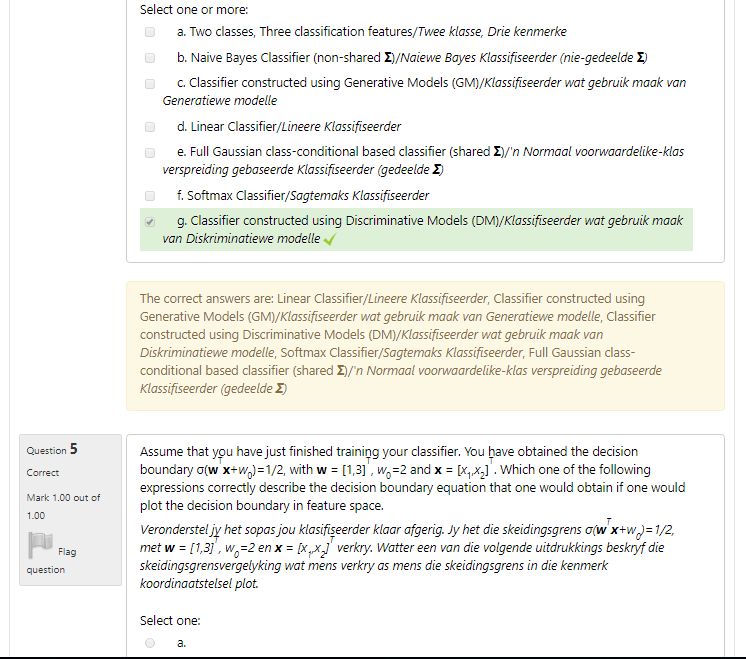

In [8]:
display(Image(filename='./Test_Part_A/Test_7.PNG'))

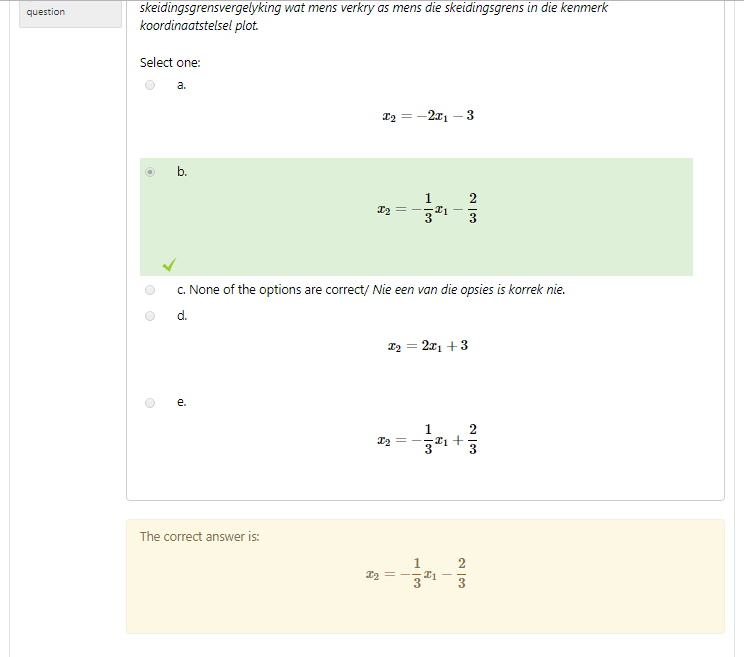

In [9]:
display(Image(filename='./Test_Part_A/Test_8.PNG'))

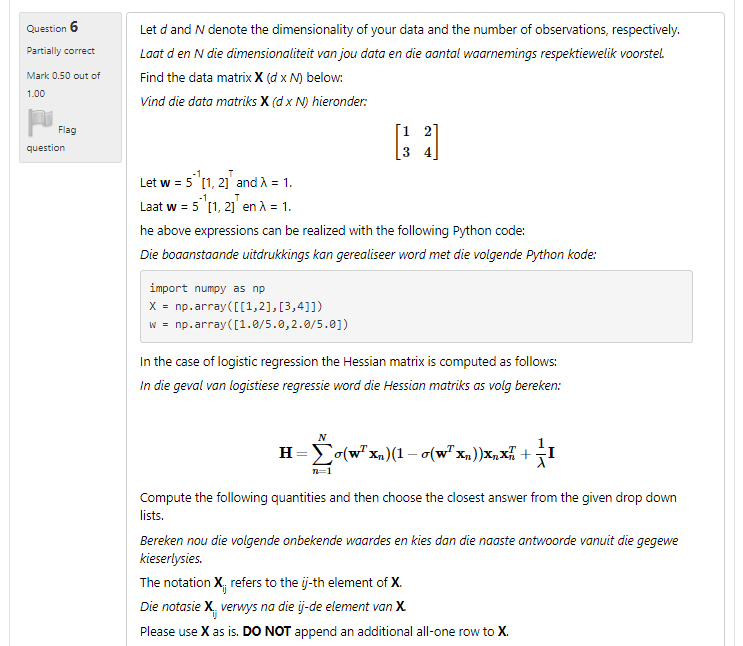

In [10]:
display(Image(filename='./Test_Part_A/Test_9.PNG'))

In [118]:
X =np.array( [[1, 2,], [3, 4]])
d=X.shape[0]
N=X.shape[1]
w=np.array([1/5, 2/5])
lmda=1

sigm1=sigmoid(w,X)
sigm2=1-sigmoid(w,X)
res=np.dot(sigm1,sigm2)
xx=np.dot(X,X.T)
# def sigmoid(w, x):


def hessian(X, w,N,lmda,d):

    #initialise hessian
    hess = 0

    # hess = sum(0, N){ sigmoid * (1 - sigmoid) * outer_x) + (1/hyper) * I }
    for n in range(0, N):

        x = X[:, n][:, np.newaxis].astype(np.float32)
        sig = sigmoid(w, x)
        outer_x = x.dot(x.T)

       # hess += sig * (1 - sig) * outer_x + (1/lmda) * (1/lmda)*np.identity(d).T
        hess += sig * (1 - sig) * outer_x +  np.array( [[1, 0], [0, 1]])

    return hess

H2=hessian(X,w,N,lmda,d)
print(H2)

[[2.57865924 1.31600338]
 [1.31600338 5.10806144]]


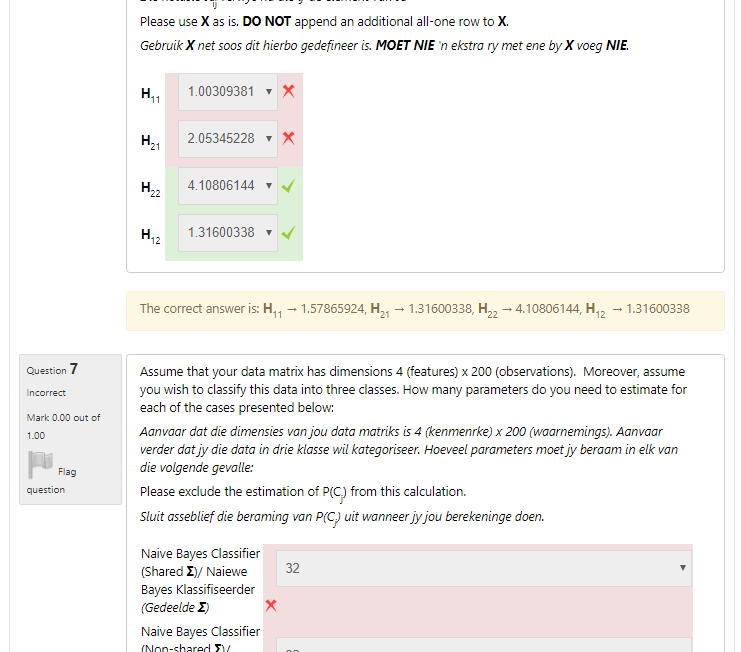

In [11]:
display(Image(filename='./Test_Part_A/Test_10.PNG'))

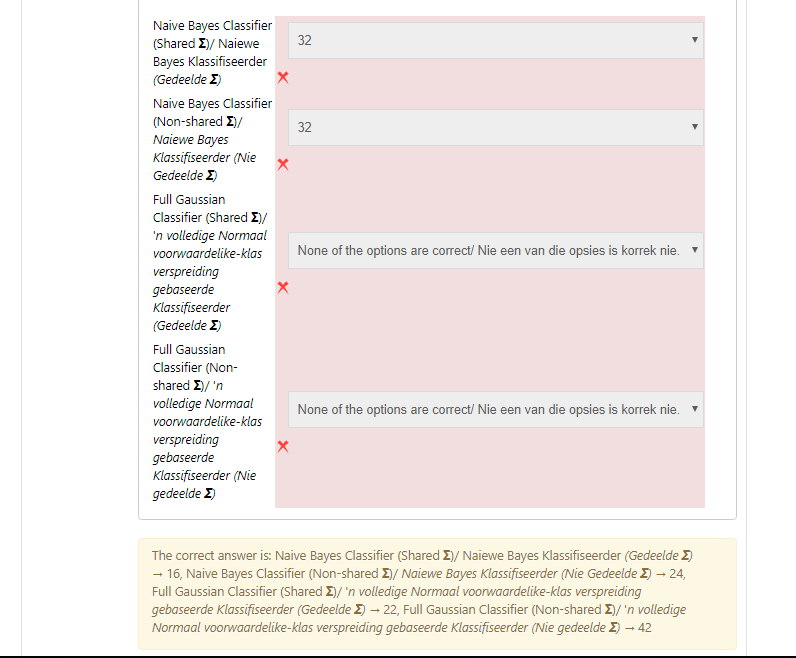

In [12]:
display(Image(filename='./Test_Part_A/Test_11.PNG'))

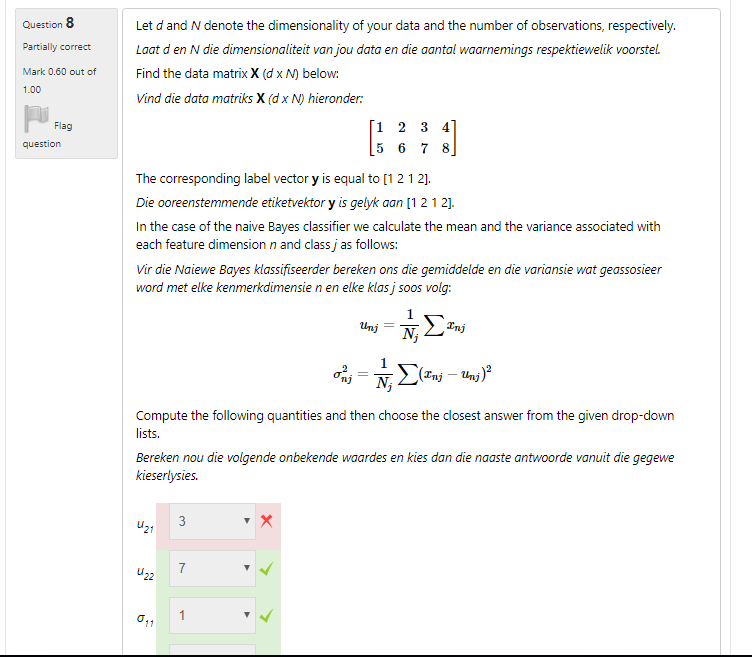

In [13]:
display(Image(filename='./Test_Part_A/Test_12.PNG'))

In [1]:
X =np.array( [[1, 2,3,4], [5,6,7,8]])
y=np.array([1, 2, 1, 2])
d=X.shape[0]
N=X.shape[1]

k = 2 #number of classes = number of unique entries in y
class_Ns=np.array([2, 2])

def calculate_means_and_variances(X, y, k,d,N,class_Ns):

    # initialise all the variable shapes
    Ns = [0. for n in range(0,k)]        # contains [N1, N2, ... Nk]
    means = np.zeros((d, k))            # contains [mean1, mean2, ... meank]
    variances = np.zeros((d, k))        # contains [var1, var2, ... vark]

    # means[n] = scaled sum of elements xn in X, with associated label yn
    for m in range(0, k):
        for n in range(0, N):
            if y[n] == m:
                x = X[:, n].astype(np.float32) # a valid data element x

                class_Ns[m] += 1

                for l in range(0, d):
                    means[l, m] += x[l]

    # normalises the mean vectors
    for m in range(0, k):
        for l in range(0, d):
            means[l, m] /= class_Ns[m]


    # variances[n] = the elements on the diagonal of sigmas[n]
    for m in range(0, k):
        for n in range(0, N):
            if y[n] == m:
                cx = X[:, n].astype(np.float32)

                for l in range(0, self.__d):
                    cx[l] -= means[l,m]

                    svariances[l,m] += cx[l] ** 2


        variances[:,m] /= float(class_Ns[m])


    # This method of getting the covariance first and then the variances is unneccessary,
    # but its easier for me to implement

NameError: name 'np' is not defined

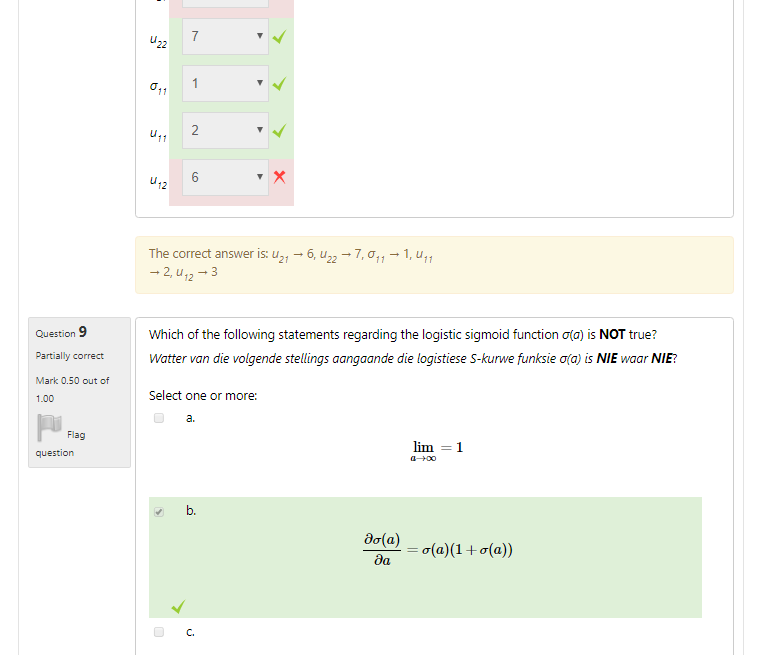

In [14]:
display(Image(filename='./Test_Part_A/Test_13.PNG'))

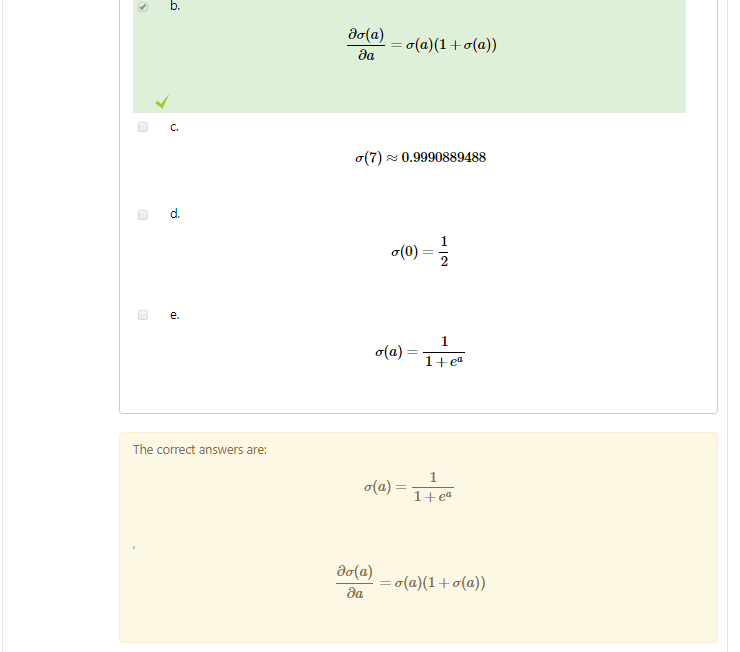

In [15]:
display(Image(filename='./Test_Part_A/Test_14.PNG'))

In [137]:
# In this question you may assume that you are dealing with a two class problem and that you are only considering a single classification feature.

# When training a Naive Bayes Classifier (assume underlying Gaussian class-conditional distributions)  we need to estimate a u (the class mean vector) 
# and a Σ (the class covariance matrix) for each class.

# Please write a Python3 function which takes in a one-dimensional list x of classification features where each element of the list corresponds to
#either of two classes and a one-dimensional list of class labels c (containing only the integers 0 and 1) and returns the estimated mean values 
#associated with each class. The label of feature x[k] is c[k], implying that the length of x and c are equal.

# NOTE: numpy may NOT be used.  Trying to use it will give a compilation error and result in you losing marks. Please ensure that your result is
#two real numbers. Return 0.0 for a class mean if you have no observations for that class.

def estimate_u(x,c):
    u0 = 0.0 #mean var associated with class 0 (having class label 0)
    u1 = 0.0 #mean var associated with class 1 (having class label 1)
    #NB: Return 0.0 for a specific class mean if you find no features belonging to that class.
    
    #MISSING CODE GOEaS HERE
    
    N=len(x)
    cnt1=0
    cnt2=0  
    
    for i in range(N):#sort
        
        if c[i]==0:#for the 0 labels
            u0 +=x[i]#sum
            cnt1+=1#count
        
        else:#if not zeros, then ones
            u1 +=x[i]
            cnt2+=1            
    
    if cnt1 != 0:#calculate mean zero if not empty
        u0 /= cnt1
    
    
    if cnt2 != 0:#calculate mean one
        u1 /= cnt2
        
        
    if cnt1 == 0:#if no features belong to class 1
        u0 =0.0
    
    
    if cnt2 == 0:#if no features belong to class 2
        u1 =0.0
    
    return u0,u1


print(estimate_u([1,3,2,5],[0,1,0,1]))#return (2.0, 3.0)

(1.5, 4.0)


In [43]:
import numpy as np
X = np.array([[9.4,9.3],[8.5,3.9]])
u = np.array([1,1])

r = np.array([[8.4],[8.3]])
t = np.array([[7.5],[2.9]])

Nj=0.3+0.5

x=X[0]-u
y=X[1]-u

sigma11=(1/Nj)*(0.3)*(X[0]-u)*r
sigma21=(1/Nj)*(0.4)*(X[1]-u)*t

s=sigma11+sigma21

print(s)

[[54.585   37.02   ]
 [37.02    30.03875]]


In [39]:
'''
Computes responsibilities. Assumes one-dimensional data and a k component mixture model.

@param p: mixture coeffecients.
@type p: 1-dimensional real valued list of length k.

@param u: class means.
@type u: 1-dimensional real valued list of length k.

@param s: class standard deviations.
@type s: 1-dimensional real valued list of length k. 

@param x: vector of scalar observations
@type x: 1-dimensional real valued list of length n.

@param c: class label
@type c: an integer in the range [0, k-1]

@return: the calculated responsibility of each observation associated with class c
@rtype: 1-dimensional real valued list of size n
'''
def estimate_gamma(p,u,s,x,c):
    import math
    from math import exp
    from math import sqrt
    
    #You may assume that x will not be empty and that the user will provide valid inputs.
    
    g = [None]*len(x) #responsibilities
    
    #MISSING CODE COMES HERE
    for k in range(len(x)):
        r[k] = (1.0/(sqrt(2*math.pi*s[k]**2)))*exp(-1*((x[k] - u[1])**2)/(2*s[k]**2)) 
        if c == 0:
            g[k] = (p[0]*r[k])/(p[0]*r+p[1]*t)
        else:
            g[k] = (p[k]*t)/(p[k]*t+p[k-1]*r[k])
    
    
    
    
    return g


print(["%.4f"%item for item in estimate_gamma([0.4,0.6],[0,1],[1,1],[-1,1,1.2],0)])
print(["%.4f"%item for item in estimate_gamma([0.4,0.6],[0,1],[1,1],[-1,1,1.2],1)])
print(["%.4f"%item for item in estimate_gamma([0.3,0.7],[0,1],[2,1.5],[-3,1,5.2],1)])
print(["%.4f"%item for item in estimate_gamma([0.6,0.4],[2,3],[2,3],[5,1,3],1)])
print(["%.4f"%item for item in estimate_gamma([0.4,0.1,0.3],[0,1,0.5],[1,1,1],[-1, 1, 1.2],0)])































IndexError: list index out of range